In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import random
import matplotlib.pyplot as plt
import seaborn as sns
from src.dataprep.make_splits_cnc import extract_data_csv

%load_ext autoreload
%autoreload 2

# Save Sample Data

In [7]:
df, unixtime = extract_data_csv('auto$004.csv')

In [8]:
df.head()

,current_main,current_sub,speed_main,speed_sub,cut_signal,tool_no
0,2,9,0,0,0,8
1,2,5,0,0,0,8
2,2,1,0,0,0,8
3,1,1,0,0,0,8
4,2,3,0,0,0,8


In [9]:
# get dtype of each column
df.dtypes

current_main    int16
current_sub     int16
speed_main      int16
speed_sub       int16
cut_signal      int16
tool_no         int16
dtype: object

In [10]:
# save only tool 54
df = df[df['tool_no'] == 54][["current_sub", "cut_signal"]].reset_index(drop=True)
df.head()

,current_sub,cut_signal
0,1,0
1,2,0
2,1,0
3,1,0
4,1,0


In [12]:
df.to_csv('tool54_example.csv', index=False)

# Load Sample Data and Plot

In [2]:
path_data_dir = Path().cwd().parent.parent / 'data'
print(path_data_dir)

/home/tim/Documents/feat-store/data


In [3]:
df = pd.read_csv(path_data_dir / "raw" / "cnc"/ "tool54_example.csv")
df.head()

,current_sub,cut_signal
0,1,0
1,2,0
2,1,0
3,1,0
4,1,0


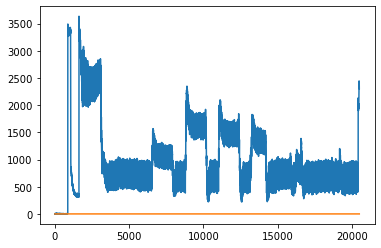

In [4]:
plt.plot(df)

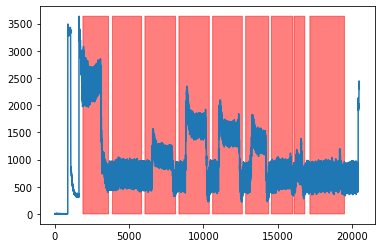

In [5]:
s = df["current_sub"].values
s2 = df["cut_signal"].values

fig, ax = plt.subplots(
    1,
    1,
    figsize=(6, 4),
)

ax.plot(s)
# ax2 = ax.twinx()

# ax2.plot(s2, color="red")
ax.fill_between(range(len(s)), min(s), max(s), where=(s2>0), color="red", alpha=0.5)



Make pretty plot with seaborn, etc.|

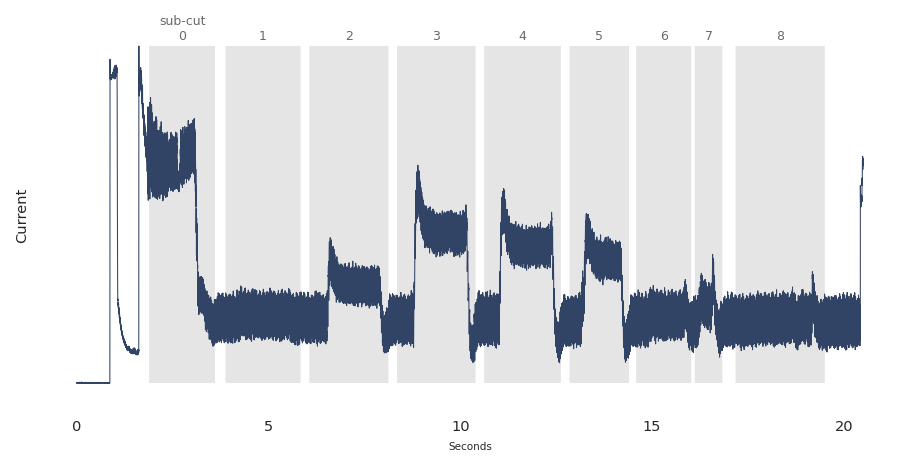

In [61]:
# data
s = df["current_sub"].values
s_cut_signal = df["cut_signal"].values

# define colour palette and seaborn style
pal = sns.cubehelix_palette(6, rot=-0.25, light=0.7)
sns.set(style="white", font="DejaVu Sans")

fig, ax = plt.subplots(
    1, 1, dpi=150, figsize=(6, 3), constrained_layout=True,
)

seconds = np.arange(0,len(s))/1000.0

ax.plot(seconds, 
                s, 
                color=pal[-2], 
                linewidth=0.5, 
                alpha=1)

ax.set_ylabel(
    "Current", fontsize=7,
)

fill_area = ax.fill_between(seconds, min(s), max(s), where=(s_cut_signal>0), color="gray", alpha=0.2, zorder=0,linewidth=0)
for i, p in enumerate(fill_area.get_paths()):
    (x0, y0), (x1, y1) = p.get_extents().get_points() # help from JohanC https://stackoverflow.com/a/67489164/9214620
    if i == 0:
        sub_cut_index_text = f"sub-cut\n{str(i)}"
    else:
        sub_cut_index_text = str(i)

    ax.text((x0 + x1) / 2, (y0 + y1)*1.01, sub_cut_index_text, ha='center', va='bottom', fontsize=6, color='dimgrey')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_yticks([])
ax.tick_params(axis="x", labelsize=7)
ax.set_xlabel('Seconds', size=5)
plt.show()

In [9]:
def plot_raw_cnc_signal(df, save_name="cnc_signal", path_save_dir=None, save_plot=False, dpi=150,):
    """
    Plot raw cnc signal
    """

    s = df["current_sub"].values
    s_cut_signal = df["cut_signal"].values

    # define colour palette and seaborn style
    pal = sns.cubehelix_palette(6, rot=-0.25, light=0.7)
    sns.set(style="white", font="DejaVu Sans")

    fig, ax = plt.subplots(
        1, 1, dpi=dpi, figsize=(6, 3), constrained_layout=True,
    )

    seconds = np.arange(0,len(s))/1000.0

    ax.plot(seconds, 
                s, 
                color=pal[-2], 
                linewidth=0.5, 
                alpha=1)

    ax.set_ylabel(
        "Current", fontsize=7,
    )

    ax.fill_between(seconds, min(s), max(s), where=(s_cut_signal>0), color="gray", alpha=0.2, zorder=0,linewidth=0)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="x", labelsize=7)
    ax.set_xlabel('Seconds', size=5)
    if save_plot:
        if path_save_dir is None:
            path_save_dir = "./"

        # save as both png and pdf
        plt.savefig(path_save_dir / f"{save_name}.png", dpi=300, bbox_inches="tight")
        plt.savefig(path_save_dir / f"{save_name}.pdf", bbox_inches="tight")
        plt.cla()
        plt.close()
    else:
        plt.show()

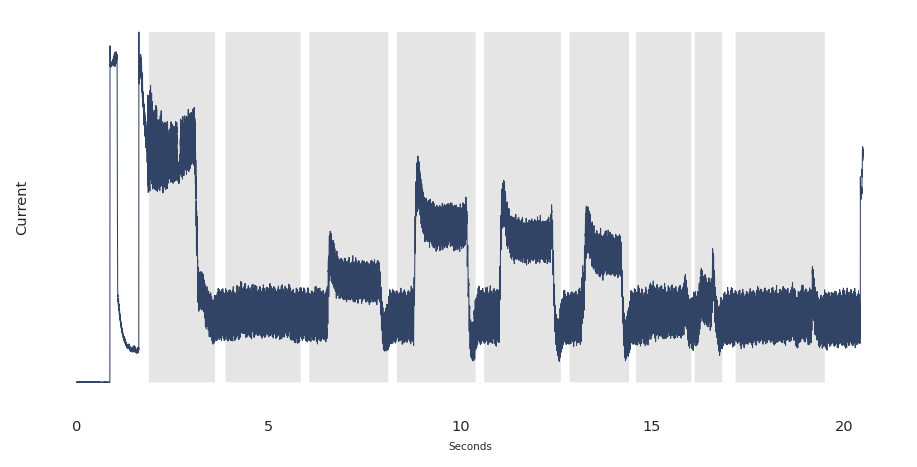

In [10]:
plot_raw_cnc_signal(df, save_name="cnc_signal", save_plot=False, dpi=150,)